<a href="https://colab.research.google.com/github/zuulaika/Projet-python/blob/main/Ch%C3%B4mage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taux de chômage 2019-2024

In [1]:
!pip install cartiflette

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 5.8 MB/s eta 0:00:00


In [2]:
from geo_utils import load_and_reproject_departements

departements_lambert93 = load_and_reproject_departements()


In [4]:
import pandas as pd
# URL directe du fichier contenant les données de taux de chômage.
url = "https://www.data.gouv.fr/api/1/datasets/r/500d1954-9849-479b-9aac-85435c6d422f"
# Lecture du fichier Excel avec un encodage adapté.
# Les données sont lues à partir de la feuille 'Moyenne annuelle', avec un en-tête à la ligne 5 et des colonnes spécifiques.
df5 = pd.read_excel(url, engine='openpyxl', header = 5, usecols=[0,1,7,10,12],
 nrows=101, sheet_name="Moyenne annuelle").dropna()
# Affiche le DataFrame pour vérification.
df5

,Département,Unnamed: 1,2019,2022,2024
0,01,Ain,6.050,5.450,5.600
1,02,Aisne,11.800,10.425,10.500
2,03,Allier,9.050,7.675,7.925
3,04,Alpes-de-Haute-Provence,10.075,8.225,7.925
4,05,Hautes-Alpes,7.925,6.875,6.225
...,...,...,...,...,...
96,M,France métropolitaine,8.175,7.075,7.175
97,971,Guadeloupe,20.125,18.600,16.750
98,972,Martinique,16.125,12.450,12.350
99,973,Guyane,17.125,13.125,16.950


# Task
Generer choropleth maps

## Preparer df5 Data pour Merging




Pour préparer le DataFrame df5 en vue de sa fusion, je vais d'abord convertir la colonne 'Département' en type chaîne de caractères pour assurer la cohérence des types de données, puis filtrer les lignes non-départementales, et enfin afficher les premières lignes et les informations du DataFrame nettoyé pour vérifier les modifications.



In [14]:
# Convertit la colonne 'Département' en type chaîne de caractères pour assurer la cohérence des types de données.
df5['Département'] = df5['Département'].astype(str)
# Filtre les lignes non-départementales (France métropolitaine 'M' et départements d'outre-mer) du DataFrame df5.
df5 = df5[~df5['Département'].isin(['M', '971', '972', '973', '974'])]
# Affiche les premières lignes du DataFrame nettoyé.
print(df5.head())
# Affiche les informations sur le DataFrame nettoyé (types de données, valeurs non nulles, etc.).
print(df5.info())

  Département               Unnamed: 1    2019    2022    2024
0          01                      Ain   6.050   5.450   5.600
1          02                    Aisne  11.800  10.425  10.500
2          03                   Allier   9.050   7.675   7.925
3          04  Alpes-de-Haute-Provence  10.075   8.225   7.925
4          05             Hautes-Alpes   7.925   6.875   6.225
<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Département  96 non-null     object 
 1   Unnamed: 1   96 non-null     object 
 2   2019         96 non-null     float64
 3   2022         96 non-null     float64
 4   2024         96 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.5+ KB
None


/tmp/ipython-input-2394867077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Département'] = df5['Département'].astype(str)


La prochaine étape logique est de fusionner ce df5 DataFrame préparé avec le departements_lambert93 GeoDataFrame pour combiner les données géographiques avec les taux de chômage, ce qui est essentiel pour créer les choropleth maps.



In [15]:
# Fusionne les données géographiques des départements (`departements_lambert93`) avec les données de taux de chômage (`df5`).
# La fusion est réalisée sur la colonne 'INSEE_DEP' du GeoDataFrame et 'Département' du DataFrame df5.
# Un 'left merge' est utilisé pour conserver toutes les entités du GeoDataFrame.
merged_data_unemployment = departements_lambert93.merge(df5, left_on='INSEE_DEP', right_on='Département', how='left')

# Affiche les premières lignes du DataFrame fusionné pour vérification.
print("\nFirst few rows of merged_data_unemployment:")
print(merged_data_unemployment.head())
# Affiche les informations sur le DataFrame fusionné (types de données, valeurs non nulles, etc.).
print("\nInfo of merged_data_unemployment:")
print(merged_data_unemployment.info())


First few rows of merged_data_unemployment:
  INSEE_DEP    PAYS LIBELLE_DEPARTEMENT  POPULATION  \
0        43  France         Haute-Loire      227570   
1        65  France     Hautes-Pyrénées      229567   
2        29  France           Finistère      915090   
3        22  France       Côtes-d'Armor      600582   
4        38  France               Isère     1271166   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry Département  \
0  POLYGON ((770266.6 6473465.6, 770255.9 6473419...          43   
1  MULTIPOLYGON (((449840.3 6280811.2, 449889.1 6...          65   
2  MULTIPOLYGON (((177277.8 6756845.8, 177266.5 6...          29   
3  MULTIPOLYGON (((245287.3 6878865.1, 245276.3 6...          22   
4  POLYGON ((863172.2 6525941.3, 862944.5 6525125

Les données ont été fusionnées avec succès. La prochaine étape consiste à visualiser les taux de chômage pour 2019 à l'aide d'une carte choroplèthe.



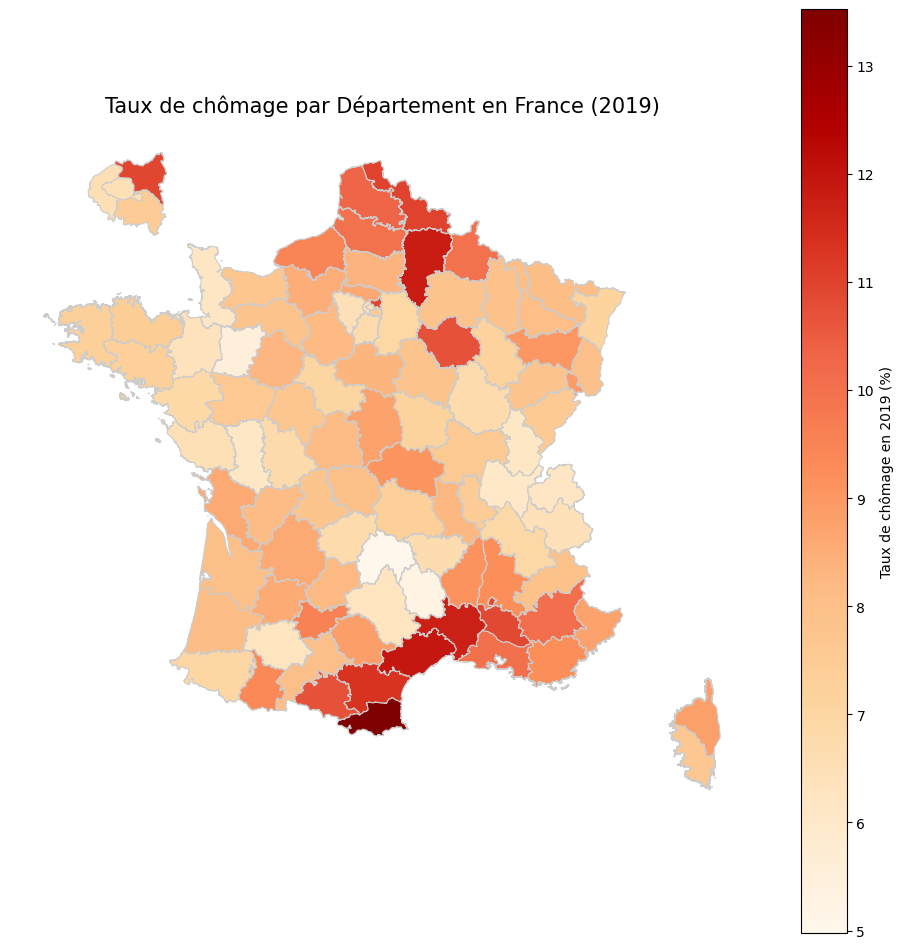

In [16]:
import matplotlib.pyplot as plt

# Convertit tous les noms de colonnes dans merged_data_unemployment en type chaîne de caractères et supprime tout espace blanc,
# garantissant ainsi un accès cohérent aux colonnes basé sur des chaînes de caractères pour le traçage.
merged_data_unemployment.columns = [str(col).strip() for col in merged_data_unemployment.columns]
# Crée une figure et un axe pour le graphique, avec une taille de 12x12 pouces.
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

merged_data_unemployment.plot(column='2019', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'label': "Taux de chômage en 2019 (%)", 'orientation': "vertical"})
ax.set_title("Taux de chômage par Département en France (2019)", fontsize=15)
ax.set_axis_off()
plt.show()

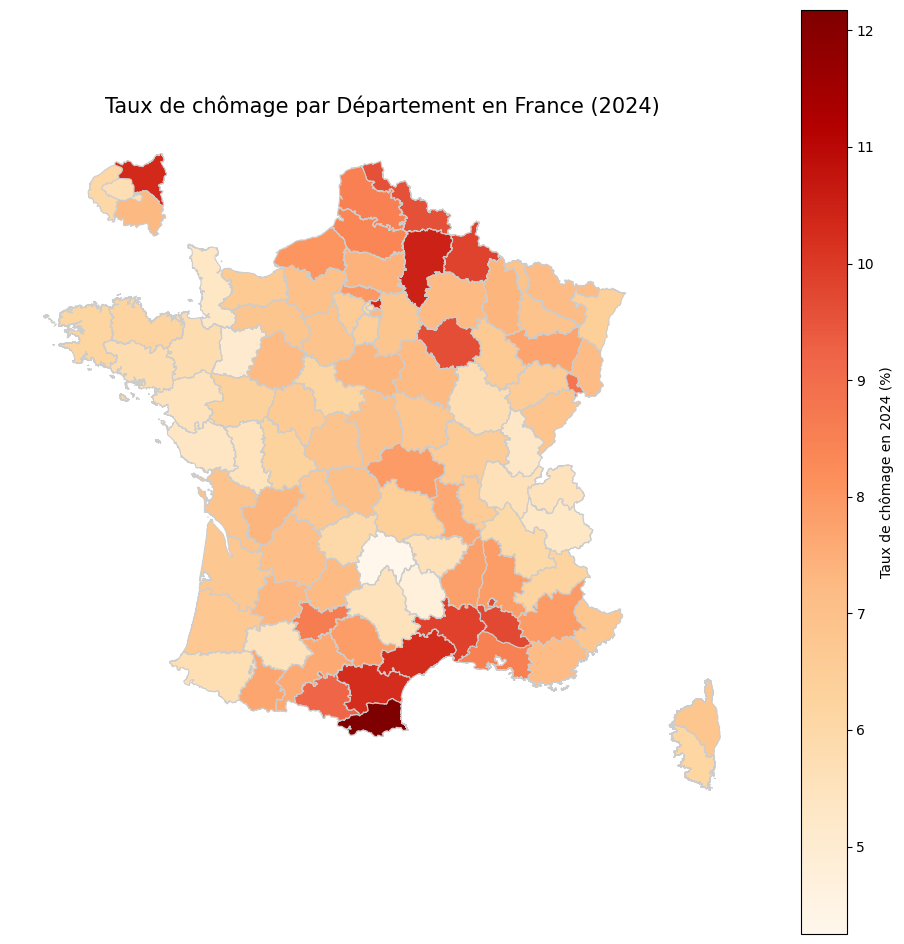

In [17]:

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# Trace la carte choroplèthe en utilisant la colonne '2024' pour la couleur.

merged_data_unemployment.plot(column='2024', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'label': "Taux de chômage en 2024 (%)", 'orientation': "vertical"})
ax.set_title("Taux de chômage par Département en France (2024)", fontsize=15)
ax.set_axis_off()
plt.show()

K-means

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélectionne les colonnes pertinentes pour le clustering (taux de chômage pour 2019, 2022, 2024).
unemployment_cols = ['2019', '2022', '2024']
clustering_data = merged_data_unemployment[unemployment_cols].copy()

# Gère les valeurs manquantes en les remplaçant par la moyenne de chaque colonne.
for col in unemployment_cols:
    if clustering_data[col].isnull().any():
        clustering_data[col] = clustering_data[col].fillna(clustering_data[col].mean())

# Standardise les données pour que chaque variable ait une moyenne de 0 et un écart-type de 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)

# Applique l'algorithme de clustering KMeans.
# Nous assumons 4 clusters comme point de départ (basé sur l'analyse de la méthode du coude).
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Prédit les clusters pour chaque département.
clusters = kmeans.fit_predict(X_scaled)
# Ajoute la colonne des clusters au DataFrame fusionné.
merged_data_unemployment['cluster'] = clusters

# Affiche la distribution des clusters.
print("Cluster distribution:")
print(merged_data_unemployment['cluster'].value_counts())
# Affiche les premières lignes avec les affectations de cluster.
print("\nFirst few rows with cluster assignments:")
print(merged_data_unemployment[['LIBELLE_DEPARTEMENT', '2019', '2022', '2024', 'cluster']].head())

Cluster distribution:
cluster
0    50
3    28
2    15
1    12
Name: count, dtype: int64

First few rows with cluster assignments:
  LIBELLE_DEPARTEMENT   2019   2022   2024  cluster
0         Haute-Loire  6.650  5.625  5.600        3
1     Hautes-Pyrénées  9.375  7.975  7.700        2
2           Finistère  7.300  6.850  6.200        0
3       Côtes-d'Armor  7.425  6.400  6.225        0
4               Isère  6.900  5.900  6.000        3


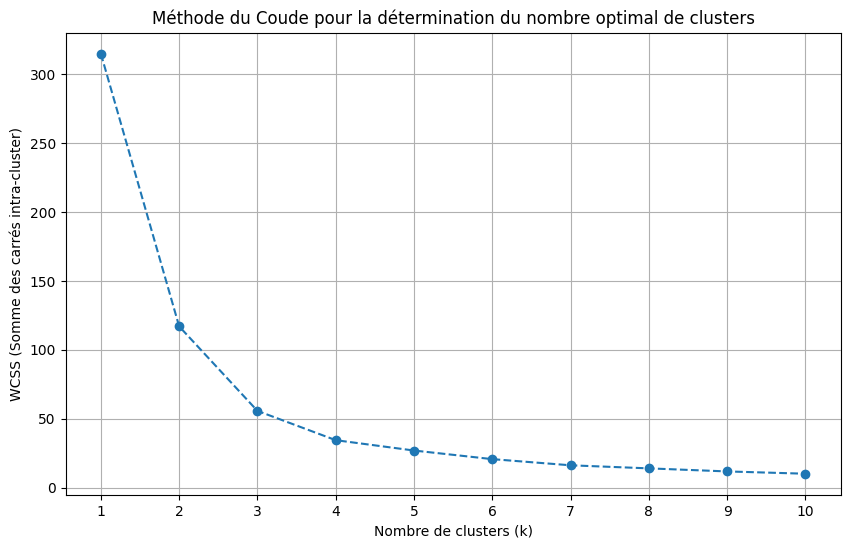

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcule la somme des carrés intra-cluster (WCSS) pour différents nombres de clusters.
wcss = []
k_range = range(1, 11) # Teste k de 1 à 10

for k in k_range:
    # Initialise et entraîne le modèle KMeans pour chaque valeur de k.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    # Ajoute le WCSS (inertia_) à la liste.
    wcss.append(kmeans.inertia_)

# Trace le graphique de la méthode du coude.
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour la détermination du nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Pour interpréter ce graphique et trouver le nombre optimal de clusters `k`, on cherche le point où la courbe forme un "coude" prononcé. C'est le point après lequel la diminution du WCSS (la somme des carrés intra-cluster) commence à ralentir significativement. Cela indique que l'ajout d'un cluster supplémentaire n'apporte plus beaucoup de gain en termes de réduction de la variance intra-cluster.

Dans ce cas, 4 clusters apparaît comme un bon candidat pour le nombre optimal de clusters, car c'est là que le bénéfice d'ajouter un cluster supplémentaire commence à devenir marginal.

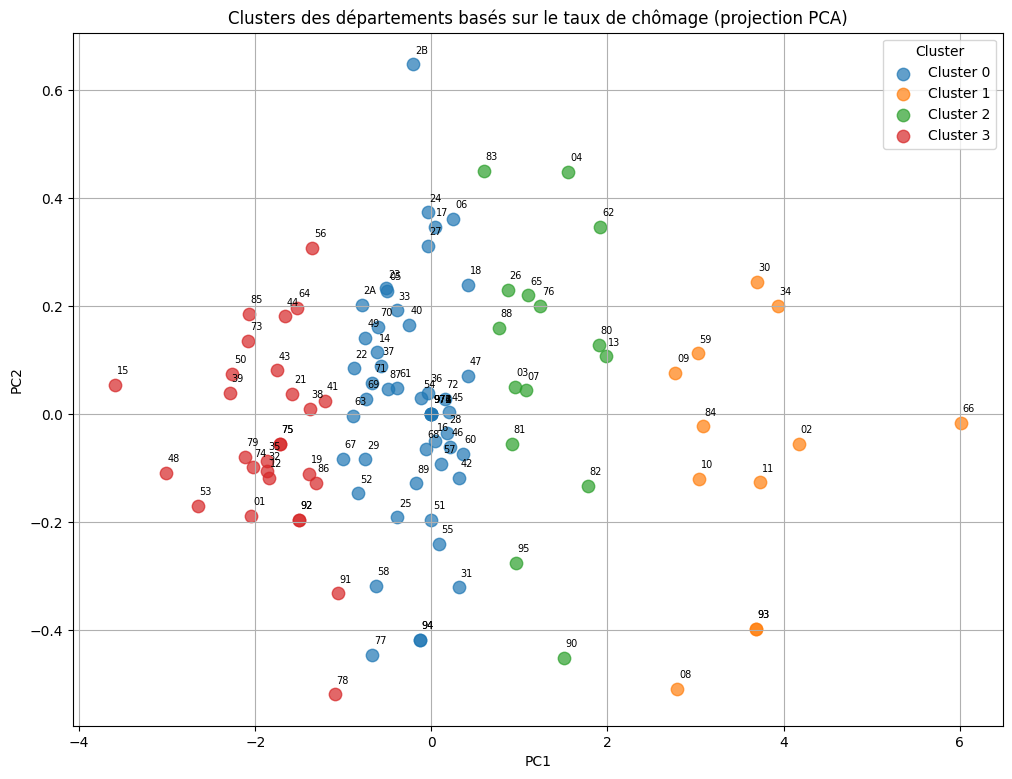

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applique la PCA (Analyse en Composantes Principales) pour projeter les données dans un espace 2D.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajoute les deux premières composantes principales (PC1 et PC2) au DataFrame fusionné.
merged_data_unemployment["PC1"] = X_pca[:, 0]
merged_data_unemployment["PC2"] = X_pca[:, 1]

# Visualisation des clusters dans l'espace PCA.
plt.figure(figsize=(12, 9))

# Obtient le cycle de couleurs par défaut de Matplotlib pour une cohérence avec le graphique de profils
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Pour chaque cluster unique, trace les points correspondants avec une couleur cohérente.
for cluster_id in sorted(merged_data_unemployment["cluster"].unique()):
    subset = merged_data_unemployment[merged_data_unemployment["cluster"] == cluster_id]
    # Utilise l'index du cluster pour sélectionner une couleur du cycle de couleurs
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster_id}", s=80, alpha=0.7, color=colors[cluster_id % len(colors)])

# Ajoute les codes INSEE des départements comme étiquettes pour une meilleure lisibilité, en ajustant légèrement leur position.
for i in range(len(merged_data_unemployment)):
    plt.text(merged_data_unemployment["PC1"].iloc[i] + 0.02, merged_data_unemployment["PC2"].iloc[i] + 0.02,
             merged_data_unemployment["INSEE_DEP"].iloc[i], fontsize=7)

# Définit le titre et les labels des axes du graphique.
plt.title("Clusters des départements basés sur le taux de chômage (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# Ajoute une légende pour les clusters.
plt.legend(title="Cluster")
# Affiche une grille pour faciliter la lecture.
plt.grid(True)
# Affiche le graphique.
plt.show()

### Interprétation des Composantes Principales (PC1 et PC2)

Sur le graphique de la PCA que nous venons de visualiser, chaque département est projeté sur deux axes principaux, PC1 et PC2, qui sont des combinaisons linéaires des taux de chômage des années 2019, 2022 et 2024. Ces composantes ont été choisies pour maximiser la variance des données :

*   **PC1 ** :
    *   C'est l'axe qui capture la **plus grande part de la variance** totale des données. Dans notre contexte, PC1 représente très probablement le niveau général de chômage des départements sur la période 2019-2024.
    *   Les départements situés à l'extrémité gauche de l'axe PC1 ont tendance à avoir des **taux de chômage globalement faibles** sur les trois années.
    *   Les départements situés à l'extrémité **droite** de l'axe PC1 ont tendance à avoir des **taux de chômage globalement élevés** sur les trois années.

*   PC2  :
    *   C'est l'axe qui capture la deuxième plus grande part de la variance, indépendamment de PC1 (car PC1 et PC2 sont orthogonales).
    *   PC2 représente souvent la **dynamique ou l'évolution des taux de chômage entre les années. Par exemple, il pourrait différencier les départements dont le chômage a fortement baissé de ceux où il est resté stable ou a augmenté, indépendamment de leur niveau général.
    *   Les départements situés en haut ou en bas de l'axe PC2 présentent des schémas d'évolution distincts par rapport à ceux au centre.

Ensemble, PC1 et PC2 nous permettent de visualiser les départements et leurs clusters dans un espace simplifié, où la distance entre les points reflète la similarité de leurs profils de chômage sur la période.

Profils moyens des clusters (taux de chômage) :
              2019      2022       2024
cluster                                
0         7.923333  6.807222   6.906667
1        11.287500  9.954167  10.135417
2         9.391667  8.016667   8.061667
3         6.416071  5.560714   5.655357


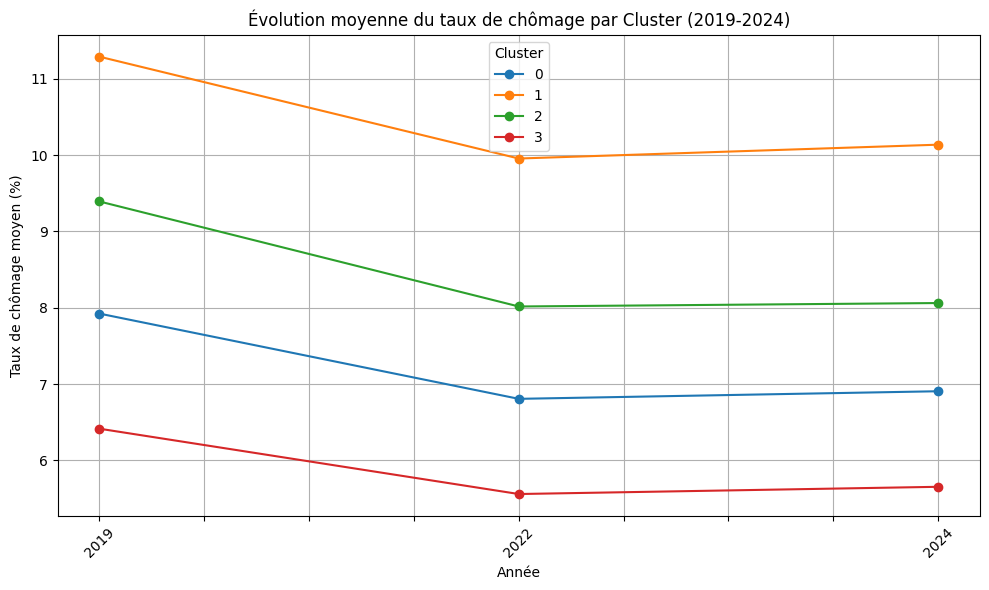

In [25]:
import seaborn as sns

# Calculer les moyennes des taux de chômage pour chaque cluster et chaque année
cluster_profiles = merged_data_unemployment.groupby('cluster')[['2019', '2022', '2024']].mean()

print("Profils moyens des clusters (taux de chômage) :")
print(cluster_profiles)

# Visualisation des profils de clusters
cluster_profiles.T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Évolution moyenne du taux de chômage par Cluster (2019-2024)')
plt.xlabel('Année')
plt.ylabel('Taux de chômage moyen (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Caractérisation des Clusters de Départements (Taux de Chômage 2019-2024)

| Cluster | Taux de Chômage Moyen (2019) | Taux de Chômage Moyen (2022) | Taux de Chômage Moyen (2024) | Tendance Générale & Caractérisation |
|---------|------------------------------|------------------------------|------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **0**   | 7.92%                        | 6.81%                        | 6.91%                        | **Intermédiaire en Amélioration** : Taux moyens, nette amélioration entre 2019 et 2022, puis légère remontée ou stabilisation. |
| **1**   | 11.29%                       | 9.95%                        | 10.14%                       | **Fortement Impacté** : Taux les plus élevés de tous les clusters, avec une légère hausse en 2024, indiquant des difficultés structurelles. |
| **2**   | 9.39%                        | 8.02%                        | 8.06%                        | **Élevé mais Décroissant** : Taux élevés mais inférieurs au Cluster 1, avec une réduction significative entre 2019 et 2022, puis une stabilisation à un niveau encore relativement haut. |
| **3**   | 6.42%                        | 5.56%                        | 5.66%                        | **Très Faible et Stable** : Taux les plus bas, très stables sur la période, avec une performance remarquable sur le marché du travail. |


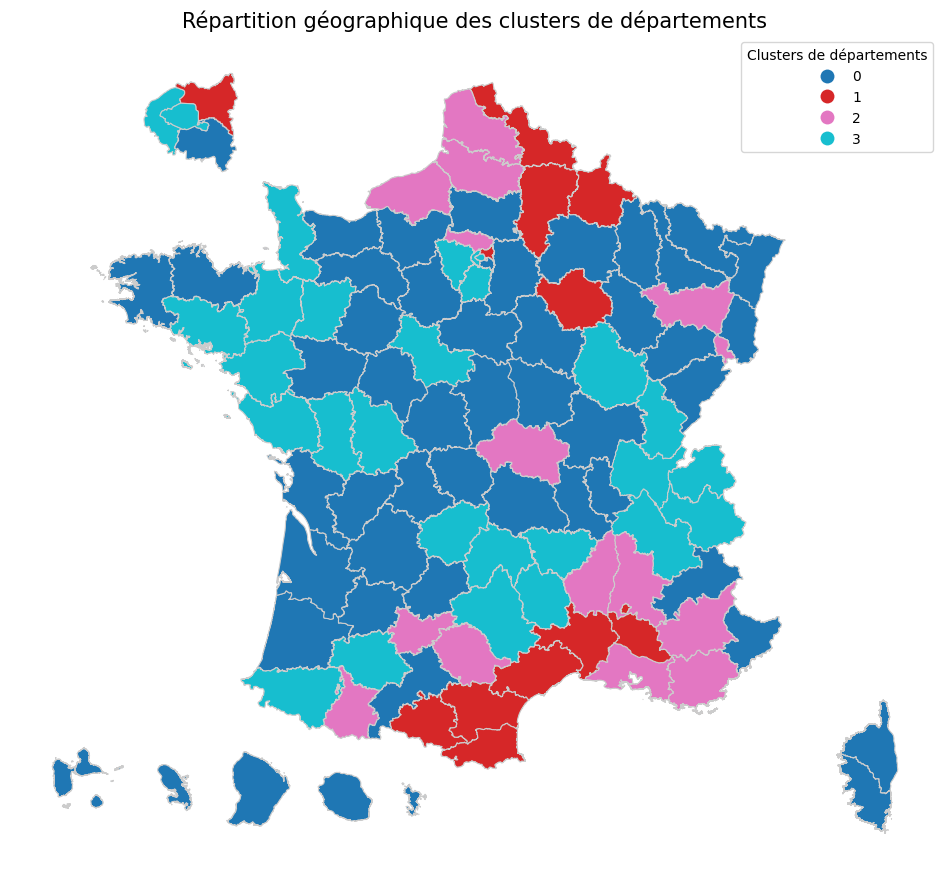

In [31]:
import matplotlib.pyplot as plt

# Convertit la colonne 'cluster' en type catégorique pour assurer une légende discrète.
merged_data_unemployment['cluster'] = merged_data_unemployment['cluster'].astype('category')

# Crée une figure et un axe pour le graphique, avec une taille de 12x12 pouces.
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Trace la carte choroplèthe en utilisant la colonne 'cluster' pour la couleur.
# 'tab10' est une palette de couleurs qualitative adaptée pour distinguer les catégories discrètes.
# 'linewidth' et 'edgecolor' définissent les bordures des polygones.
# 'legend' affiche une légende et 'legend_kwds' personnalise son titre.
merged_data_unemployment.plot(column='cluster', cmap='tab10', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'title': "Clusters de départements"})

# Définit le titre de la carte.
ax.set_title("Répartition géographique des clusters de départements", fontsize=15)
# Désactive les axes pour une meilleure visualisation de la carte.
ax.set_axis_off()
# Affiche la carte.
plt.show()